In [22]:
# Importing Essential libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Loading the movies and ratings datasets into pandas DataFrames.
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [24]:
# Viewing the first five rows of the ratings DataFrame.
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [25]:
# Viewing the first five rows of the movies DataFrame.
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
# Displaying the dimensions of the movies and ratings DataFrames.
print(movies.shape)
print(ratings.shape)

(10331, 3)
(105341, 4)


In [27]:
# Displays  Movies DataFrame summary.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10331 entries, 0 to 10330
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10331 non-null  int64 
 1   title    10331 non-null  object
 2   genres   10331 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.3+ KB


In [28]:
# Displays  Ratings DataFrame summary.
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105341 entries, 0 to 105340
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105341 non-null  int64  
 1   movieId    105341 non-null  int64  
 2   rating     105341 non-null  float64
 3   timestamp  105341 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [29]:
# Summary statistics of Movies : count, mean, std, min, quartiles, max
movies.describe()

,movieId
count,10331.000000
mean,31947.051108
std,37766.552634
min,1.000000
25%,3241.500000
50%,7089.000000
75%,59909.000000
max,149534.000000


In [30]:
# Summary statistics of Ratings: count, mean, std, min, quartiles, max
ratings.describe()

,userId,movieId,rating,timestamp
count,105341.000000,105341.000000,105341.000000,1.053410e+05
mean,364.930293,13383.897457,3.516869,1.130430e+09
std,197.489445,26176.931765,1.044871,1.802697e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149534.000000,5.000000,1.452405e+09


In [31]:
# Filter duplicates: rows with duplicated 'title' values
movies[movies['title'].duplicated()]

,movieId,title,genres
6270,26982,Men with Guns (1997),Drama
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [32]:
# Drop rows where 'movieId' equals 26982
movies.drop(movies.loc[movies['movieId']==26982].index, inplace=True)


In [33]:
# Remove rows with 'movieId' equal to 64997
movies.drop(movies.loc[movies['movieId']==64997].index, inplace=True)


In [34]:
# Count of missing values for each column in ratings
ratings.isnull().sum()


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [35]:
# Count of missing values for each column in movies
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [36]:
ratings.isnull().sum()




userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [37]:
# Merge ratings and movies, drop 'timestamp' column
movies_ratings = pd.merge(ratings, movies, on='movieId')
movies_ratings.drop('timestamp', axis=1, inplace=True)
movies_ratings

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,1,24,1.5,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
105331,668,143385,4.0,Bridge of Spies (2015),Drama|Thriller
105332,668,144976,2.5,Bone Tomahawk (2015),Horror|Western
105333,668,148626,4.5,The Big Short (2015),Drama
105334,668,149533,4.5,Avengers,Animation|Children|Comedy


In [38]:
# Remove duplicate rows from movies_ratings DataFrame
movies_ratings.drop_duplicates(inplace=True)


Highest Rated Movies

In [39]:
# Top 10 movies by total rating, grouped and sorted by rating
top_movies = movies_ratings[['title', 'rating']].groupby('title').sum().sort_values('rating', ascending=False).head(10)
top_movies

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


C:\Users\zakir hussain\AppData\Local\Temp\ipykernel_27092\3642189084.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c1 = sns.barplot(x=top_movies.index, y='rating', data=top_movies, palette=sns.color_palette())


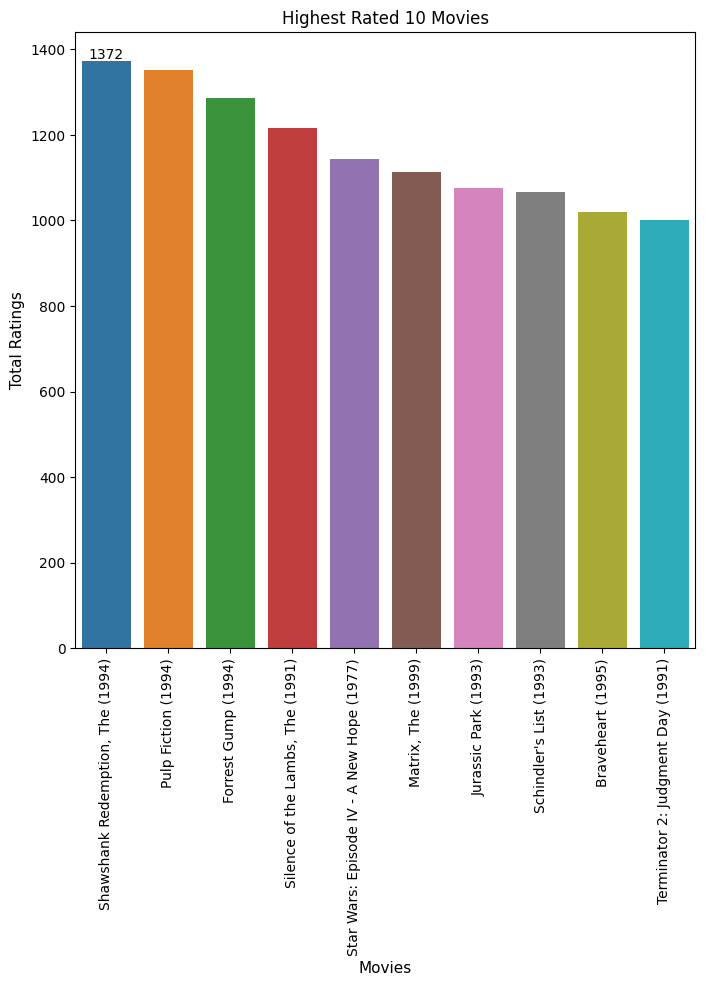

In [40]:
# Plot top 10 movies by total ratings with bar labels
plt.figure(figsize=(8,8))
colors = ['blue','orange','gold']
c1 = sns.barplot(x=top_movies.index, y='rating', data=top_movies, palette=sns.color_palette())
c1.bar_label(c1.containers[0])
plt.xticks(rotation=90)
plt.title("Highest Rated 10 Movies")
plt.ylabel("Total Ratings", fontsize=11)
plt.xlabel("Movies", fontsize=11)
plt.show()


OBJECTIVE 1:



Popularity-based recommender system at a genre level

-Filter movies by genre and ensure each has at least (t) reviews.

-Recommend top N movies, sorted by ratings in descending order.

In [41]:
def popularity_recommender(genre, min_reviews, num_recommendations):
    # Filter movies that contain the specified genre
    genre_movies = movies_ratings[movies_ratings['genres'].str.contains(genre)]
    
    # Group by title and calculate the average rating and count of reviews for each movie
    movie_stats = genre_movies.groupby('title').agg({'rating': ['mean', 'count']})
    movie_stats.columns = ['average_rating', 'num_reviews']
    
    # Filter movies by the minimum number of reviews
    popular_movies = movie_stats[movie_stats['num_reviews'] >= min_reviews]
    
    if popular_movies.empty:
        return "No movies found for the given genre and minimum review threshold."
    
    # Sort the filtered movies by average rating in descending order and select the top N movies
    top_movies = popular_movies.sort_values(by='average_rating', ascending=False).head(num_recommendations)
    
    return top_movies.reset_index()

# Example input
genre = 'Comedy'  # The genre we want to filter by
min_reviews= 200  # Minimum number of reviews for a movie to be considered
num_recommendations = 5  # The number of top movies to recommend

# Get recommendations
recommendations = popularity_recommender(genre, min_reviews, num_recommendations)
print(recommendations)



                       title  average_rating  num_reviews
0               Fargo (1996)        4.271144          201
1        Pulp Fiction (1994)        4.160000          325
2        Forrest Gump (1994)        4.138264          311
3  Back to the Future (1985)        3.943662          213
4           Toy Story (1995)        3.907328          232


Objective 2:-

-Create a content-based recommender system that recommends top N movies based on similar movie(m) genres.

In [42]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

def content_based_recommender(movie_title, num_recommendations):
    # Find the row index of the input movie title
    if movie_title not in movies_ratings['title'].values:
        return f"Movie title '{movie_title}' not found in the dataset."
    
    movie_index = movies_ratings[movies_ratings['title'] == movie_title].index[0]
    
    # Extract genres of all movies
    genres = movies_ratings['genres']
    
    # Initialize CountVectorizer to convert text data into token counts
    count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split('|'))
    genre_matrix = count_vectorizer.fit_transform(genres)
    
    # Calculate cosine similarity between the input movie and all other movies
    similarity_scores = cosine_similarity(genre_matrix[movie_index], genre_matrix).flatten()
    
    # Get indices of movies sorted by similarity scores
    sorted_movie_indices = similarity_scores.argsort()[::-1]
    
    # Exclude the input movie itself
    sorted_movie_indices = sorted_movie_indices[1:num_recommendations + 1]
    
    # Recommend top N similar movies
    recommended_movies = movies_ratings.iloc[sorted_movie_indices]
    
    return recommended_movies[['title', 'genres']]

# Example input
movie_title = 'Jumanji (1995)'
num_recommendations = 5

# Get recommendations
recommendations = content_based_recommender(movie_title, num_recommendations)
print(recommendations)


c:\Users\zakir hussain\anaconda3\envs\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                                                   title  \
4621                                 Return to Oz (1985)   
75282   Chronicles of Narnia: Prince Caspian, The (2008)   
22718  Chronicles of Narnia: The Lion, the Witch and ...   
57596  Chronicles of Narnia: The Lion, the Witch and ...   
91460                                     Jumanji (1995)   

                           genres  
4621   Adventure|Children|Fantasy  
75282  Adventure|Children|Fantasy  
22718  Adventure|Children|Fantasy  
57596  Adventure|Children|Fantasy  
91460  Adventure|Children|Fantasy  


Objective-3

Create a collaborative based recommender system which recommends top N movies based on “K” similar users for a target user “u”

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-movie rating matrix (rows: users, columns: movies)
user_movie_ratings = movies_ratings.pivot_table(index='userId', columns='movieId', values='rating')


def collaborative_recommender(user_id, num_recommendations, k_similar_users):
    # Step 1: Calculate cosine similarity between all users
    user_similarity = cosine_similarity(user_movie_ratings.fillna(0))
    
    
    # Step 2: Get the similarity scores for the target user
    user_idx = user_id - 1  # userId starts from 1, but array indexing is 0-based
    similar_users = list(enumerate(user_similarity[user_idx]))
    
    # Step 3: Sort users by similarity score in descending order
    similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)
    
    # Step 4: Select the top K similar users (excluding the target user)
    similar_users = similar_users[1:k_similar_users+1]  # Exclude self, and get top K
    
    # Step 5: Gather movie ratings from these similar users
    similar_user_ids = [user[0] + 1 for user in similar_users]  # Converting index back to userId
    similar_users_ratings = user_movie_ratings.loc[similar_user_ids]
    
    # Step 6: Find movies that the target user has not rated
    target_user_ratings = user_movie_ratings.loc[user_id]
    unrated_movies = target_user_ratings[target_user_ratings.isna()].index
    
    # Step 7: Get average ratings for the unrated movies from similar users
    similar_users_ratings_for_unrated = similar_users_ratings[unrated_movies]
    avg_ratings_for_unrated = similar_users_ratings_for_unrated.mean().sort_values(ascending=False)
    
    # Step 8: Get the top N movie recommendations
    top_movie_ids = avg_ratings_for_unrated.head(num_recommendations).index
    
    # Step 9: Get the movie titles for the top N recommendations
    top_movies = movies[movies['movieId'].isin(top_movie_ids)]
    
    if top_movies.empty:
        return "No recommendations available based on the current users."
    
    return top_movies[['title']].reset_index(drop=True)

# Example Input:
user_id = 1
num_recommendations = 10
k_similar_users = 1000

# Get recommendations
recommendations = collaborative_recommender(user_id, num_recommendations, k_similar_users)
print(recommendations)


                                               title
0                 Cold Fever (Á köldum klaka) (1995)
1                                  Three Ages (1923)
2                                   Swan, The (1956)
3                                Cowboys, The (1972)
4                           Symbol (Shinboru) (2009)
5                      Waiting for 'Superman' (2010)
6  Ghost in the Shell: Stand Alone Complex - The ...
7                                       Feast (2014)
8                                The Revenant (2015)
9                 Everything's Gonna Be Great (1998)


In [44]:
import random
movie=random.choice(movies_ratings.title.unique())
print("Recommendation for movie :  {}\n".format(movie))


Recommendation for movie :  Cop Car (2015)



In [45]:
# Show the first 5 rows of the pivot table
print(user_movie_ratings.head())


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2           5.0     NaN     2.0     NaN     3.0     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     3.0     NaN     3.0     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  144976  146344  146656  146684  146878  148238  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     N